In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Read the dataset
df = pd.read_csv('../chapter_03_churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
len(df)

7043

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- **CustomerID**: the ID of the customer
- **Gender**: male/female
- **SeniorCitizen**: whether the customer is a senior citizen (0/1)
- **Partner**: whether they live with a partner (yes/no)
- **Dependents**: whether they have dependents (yes/no)
- **Tenure**: number of months since the start of the contract
- **PhoneService**: whether they have phone service (yes/no)
- **MultipleLines**: whether they have multiple phone lines (yes/no/no phone service)
- **InternetService**: the type of internet service (no/fiber/optic)
- **OnlineSecurity**: if online security is enabled (yes/no/no internet)
- **OnlineBackup**: if online backup service is enabled (yes/no/no internet)
- **DeviceProtection**: if the device protection service is enabled (yes/no/no internet)
- **TechSupport**: if the customer has tech support (yes/no/no internet)
- **StreamingTV**: if the TV streaming service is enabled (yes/no/no internet)
- **StreamingMovies**: if the movie streaming service is enabled (yes/no/no internet)
- **Contract**: the type of contract (monthly/yearly/two years)
- **PaperlessBilling**: if the billing is paperless (yes/no)
- **PaymentMethod**: payment method (electronic check, mailed check, bank transfer, credit card)
- **MonthlyCharges**: the amount charged monthly (numeric)
- **TotalCharges**: the total amount charged (numeric)
- **Churn**: if the client has canceled the contract (yes/no)


In [5]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [7]:
## Missing value in TotalCharges
total_charges =pd.to_numeric(df.TotalCharges,errors='coerce')
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [8]:
## Set the missing values to zero
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
## columns uniform by lowercasing 
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes =='object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [10]:
## target convert in boolean
df.churn = (df.churn == 'yes').astype(int)

In [11]:
## data splitting
from sklearn.model_selection import train_test_split

In [12]:
df_train_full, df_test = train_test_split(df,test_size=0.2, random_state=42)

In [13]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

In [14]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [15]:
del df_train['churn']
del df_val['churn']

### EDA Exploratory data aanalysis

In [16]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
## Distribution of values in the Target variable
df_train_full.churn.value_counts()

churn
0    4138
1    1496
Name: count, dtype: int64

In [18]:
## The proportion of churned users
global_mean  = df_train_full.churn.mean()
round(global_mean,2)*100

27.0

the dataset is imbalanced. The churn rate is our date 27%

In [19]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
'phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection',
'techsupport', 'streamingtv', 'streamingmovies',
'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [20]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance analysis

What makes customers churn? and What are the characteristics of people who churn?

#### churn rate

In [21]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(f'male is {round(male_mean*100,2)}% and female{round(female_mean*100,2)}% ')

male is 26.05% and female27.08% 


The difference between the group rates for both females
and males is quite small, which indicates that knowing the gender of the customer
doesn’t help us identify whether they will churn.

In [22]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(f'"yes" is {round(partner_yes*100,2)}% and  "no" {round(partner_no*100,2)}% ')

"yes" is 20.07% and  "no" 32.64% 


As we see, the rates for those who have a partner are quite different from rates for
those who don’t: 20% and 33%, respectively. It means that clients with no partner are
more likely to churn than the ones with a partner

### Risk ratio

In [23]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group

,mean
gender,
female,0.270841
male,0.260478


In [24]:
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean']/ global_mean
df_group

,mean,diff,risk
gender,,,
female,0.270841,0.005310,1.019998
male,0.260478,-0.005053,0.980971


In [25]:
from IPython.display import display
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean']/ global_mean
    display(df_group)
    

,mean,diff,risk
gender,,,
female,0.270841,0.005310,1.019998
male,0.260478,-0.005053,0.980971


,mean,diff,risk
seniorcitizen,,,
0,0.237098,-0.028433,0.892922
1,0.413907,0.148377,1.558793


,mean,diff,risk
partner,,,
no,0.326446,0.060916,1.229411
yes,0.200733,-0.064798,0.755968


,mean,diff,risk
dependents,,,
no,0.312326,0.046795,1.176233
yes,0.155674,-0.109856,0.586276


,mean,diff,risk
phoneservice,,,
no,0.253623,-0.011908,0.955156
yes,0.266824,0.001293,1.004871


,mean,diff,risk
multiplelines,,,
no,0.251397,-0.014134,0.946771
no_phone_service,0.253623,-0.011908,0.955156
yes,0.284105,0.018574,1.069952


,mean,diff,risk
internetservice,,,
dsl,0.191851,-0.073679,0.722521
fiber_optic,0.415558,0.150028,1.565010
no,0.076606,-0.188924,0.288502


,mean,diff,risk
onlinesecurity,,,
no,0.416014,0.150484,1.566727
no_internet_service,0.076606,-0.188924,0.288502
yes,0.145342,-0.120189,0.547363


,mean,diff,risk
onlinebackup,,,
no,0.398693,0.133162,1.501494
no_internet_service,0.076606,-0.188924,0.288502
yes,0.216531,-0.048999,0.815467


,mean,diff,risk
deviceprotection,,,
no,0.387706,0.122175,1.460117
no_internet_service,0.076606,-0.188924,0.288502
yes,0.226825,-0.038705,0.854234


,mean,diff,risk
techsupport,,,
no,0.413472,0.147941,1.557153
no_internet_service,0.076606,-0.188924,0.288502
yes,0.152855,-0.112676,0.575657


,mean,diff,risk
streamingtv,,,
no,0.335418,0.069887,1.263197
no_internet_service,0.076606,-0.188924,0.288502
yes,0.298945,0.033415,1.125841


,mean,diff,risk
streamingmovies,,,
no,0.333333,0.067803,1.255348
no_internet_service,0.076606,-0.188924,0.288502
yes,0.301320,0.035789,1.134784


,mean,diff,risk
contract,,,
month-to-month,0.426533,0.161002,1.606340
one_year,0.117987,-0.147544,0.444343
two_year,0.028379,-0.237151,0.106878


,mean,diff,risk
paperlessbilling,,,
no,0.16414,-0.101390,0.618159
yes,0.33594,0.070409,1.265164


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.174475,-0.091056,0.657080
credit_card_(automatic),0.152404,-0.113126,0.573961
electronic_check,0.449921,0.184390,1.694420
mailed_check,0.190328,-0.075203,0.716782


- For **gender**, there is not much difference between females and males. Both means are approximately the same, and for both groups, the risks are close to 1.
- **Senior citizens** tend to churn more than nonseniors: the risk of churning is 1.53 for seniors and 0.89 for nonseniors.
- People with a **partner** churn less than people with no partner. The risks are 0.75 and 1.22, respectively.
- People who use **phone service** are not at risk of churning: the risk is close to 1, and there’s almost no difference with the global churn rate. People who don’t use phone service are even less likely to churn: the risk is below 1, and the difference with the global churn rate is negative. 
- Clients with no **tech support** tend to churn more than those who do.
- People with **monthly contracts** cancel the contract a lot more often than others, and people with **two-year contacts** churn very rarely.


### mutual Information

In [26]:
'''
Mutual information  implement in Scikit-learn in the mutual_info_
score function from the metrics packag
'''
from sklearn.metrics import mutual_info_score

In [27]:
def calculate_mi(series):
    return mutual_info_score(series,df_train_full.churn)

In [28]:
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.096652
onlinesecurity,0.063393
techsupport,0.060935
internetservice,0.053313
onlinebackup,0.045424
paymentmethod,0.042861
deviceprotection,0.042007
streamingtv,0.030844
streamingmovies,0.030705
paperlessbilling,0.019077


In [29]:
##  The most useful features according
#to the mutual information score
df_mi[:5]

,MI
contract,0.096652
onlinesecurity,0.063393
techsupport,0.060935
internetservice,0.053313
onlinebackup,0.045424


In [30]:
#he least useful features according
#to the mutual information score
df_mi[-5:]

,MI
partner,0.010227
seniorcitizen,0.010059
multiplelines,0.000654
gender,0.000069
phoneservice,0.000040


### Correlation Coefficient

In [31]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

### Feature engineered

In [32]:
## One-hot encoding for categorical variables

In [33]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'no',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 18,
  'monthlycharges': 71.1,
  'totalcharges': 1247.75},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  't

In [34]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [35]:
X_train = dv.transform(train_dict)
X_train[0]

array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 7.11000e+01, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.80000e+01, 1.24775e+03])

In [36]:
feature_names = dv.get_feature_names_out()
print(feature_names)

['contract=month-to-month' 'contract=one_year' 'contract=two_year'
 'dependents=no' 'dependents=yes' 'deviceprotection=no'
 'deviceprotection=no_internet_service' 'deviceprotection=yes'
 'gender=female' 'gender=male' 'internetservice=dsl'
 'internetservice=fiber_optic' 'internetservice=no' 'monthlycharges'
 'multiplelines=no' 'multiplelines=no_phone_service' 'multiplelines=yes'
 'onlinebackup=no' 'onlinebackup=no_internet_service' 'onlinebackup=yes'
 'onlinesecurity=no' 'onlinesecurity=no_internet_service'
 'onlinesecurity=yes' 'paperlessbilling=no' 'paperlessbilling=yes'
 'partner=no' 'partner=yes' 'paymentmethod=bank_transfer_(automatic)'
 'paymentmethod=credit_card_(automatic)' 'paymentmethod=electronic_check'
 'paymentmethod=mailed_check' 'phoneservice=no' 'phoneservice=yes'
 'seniorcitizen' 'streamingmovies=no'
 'streamingmovies=no_internet_service' 'streamingmovies=yes'
 'streamingtv=no' 'streamingtv=no_internet_service' 'streamingtv=yes'
 'techsupport=no' 'techsupport=no_interne

### Machine learning for classification

#### Logic regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
y_pred_val = model.predict_proba(X_val)[:,1]
y_pred_val

array([0.15357035, 0.2743258 , 0.43779722, ..., 0.6660832 , 0.0028808 ,
       0.29710535])

In [41]:
churn = y_pred_val >= 0.5

In [42]:
churn.mean()

0.22043010752688172

In [43]:
(y_val == churn).mean()

0.7973118279569893

After executing this line of code, we see 0.8 in output. This means that the model
predictions matched the actual value 80% of the time, or the model makes correct
predictions in 80% of cases. This is what we call the accuracy of the model.

### Model interpretation

In [44]:
model.intercept_[0]

-0.15395803191323576

In [45]:
model.coef_[0]

array([ 7.15476942e-01, -8.56565494e-02, -7.83778424e-01, -5.28392317e-02,
       -1.01118800e-01, -1.83218775e-03, -1.30849767e-01, -2.12760776e-02,
        4.04450412e-02, -1.94403073e-01, -3.35640015e-01,  3.12531750e-01,
       -1.30849767e-01,  3.43401272e-03, -2.55407977e-01,  1.00405737e-01,
        1.04420863e-03,  3.71045103e-02, -1.30849767e-01, -6.02127757e-02,
        1.68954712e-01, -1.30849767e-01, -1.92062977e-01, -2.54908843e-01,
        1.00950811e-01, -6.11283661e-02, -9.28296658e-02, -9.44539054e-02,
       -1.81052346e-01,  1.98711275e-01, -7.71630553e-02,  1.00405737e-01,
       -2.54363768e-01,  9.31880544e-02, -1.69079556e-01, -1.30849767e-01,
        1.45971290e-01, -6.10954899e-02, -1.30849767e-01,  3.79872246e-02,
        1.67161010e-01, -1.30849767e-01, -1.90269275e-01, -5.42703518e-02,
        2.33430686e-04])

In [46]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.715,
 'contract=one_year': -0.086,
 'contract=two_year': -0.784,
 'dependents=no': -0.053,
 'dependents=yes': -0.101,
 'deviceprotection=no': -0.002,
 'deviceprotection=no_internet_service': -0.131,
 'deviceprotection=yes': -0.021,
 'gender=female': 0.04,
 'gender=male': -0.194,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.313,
 'internetservice=no': -0.131,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.255,
 'multiplelines=no_phone_service': 0.1,
 'multiplelines=yes': 0.001,
 'onlinebackup=no': 0.037,
 'onlinebackup=no_internet_service': -0.131,
 'onlinebackup=yes': -0.06,
 'onlinesecurity=no': 0.169,
 'onlinesecurity=no_internet_service': -0.131,
 'onlinesecurity=yes': -0.192,
 'paperlessbilling=no': -0.255,
 'paperlessbilling=yes': 0.101,
 'partner=no': -0.061,
 'partner=yes': -0.093,
 'paymentmethod=bank_transfer_(automatic)': -0.094,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.199,
 '

In [47]:
small_subset = ['contract','tenure','totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)


In [48]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [49]:
model_small = LogisticRegression(solver='liblinear', random_state=42)
model_small.fit(X_small_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [50]:
model_small.intercept_[0]

-0.691882020501075

In [51]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.936,
 'contract=one_year': -0.364,
 'contract=two_year': -1.264,
 'tenure': -0.09,
 'totalcharges': 0.001}

### Using model

In [52]:
customer = {

'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [53]:
X_test = dv.transform([customer])

In [54]:
model.predict_proba(X_test)[0,1]

0.07513850428006127

## Evaluation metrics for classification

### Evaluation metrics

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred_val

array([0.15357035, 0.2743258 , 0.43779722, ..., 0.6660832 , 0.0028808 ,
       0.29710535])

In [57]:
thresholds = np.linspace(0,1,11)
for t in thresholds:
    churn = y_pred_val >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc) )

0.00 0.260
0.10 0.611
0.20 0.697
0.30 0.752
0.40 0.776
0.50 0.797
0.60 0.795
0.70 0.769
0.80 0.745
0.90 0.740
1.00 0.740


In [58]:
thresholds = np.linspace(0,1,21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val,y_pred_val >= t)
    accuracies.append(acc)

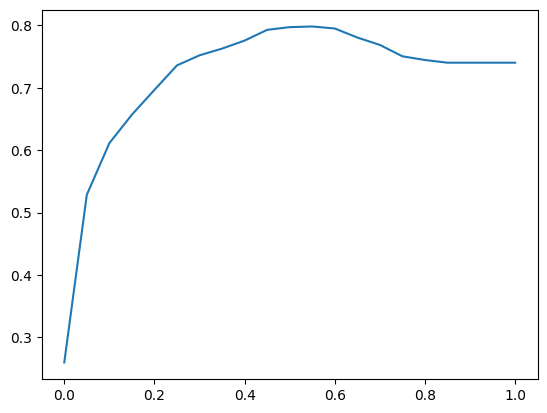

In [59]:
plt.plot(thresholds,accuracies)

In [60]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]
churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

0.7650537634408602

When we run this code, we see that the accuracy of the small model is 76%. So, the
large model is actually 4% more accurate than the small model.
However, this still doesn’t tell us whether 80% (or 76%) is a good accuracy score

### Dummy baseline

In [61]:
size_val = len(y_val)
baseline = np.repeat(False,size_val)

In [62]:
accuracy_score(baseline,y_val)

0.7403225806451613

### Confusion table

In [63]:
t = 0.5
## Makes predictions at threshold
predict_churn = y_pred_val >= t
predict_no_churn = y_pred_val < t

## Gets the actual target values
actual_churn = y_val == 1
actual_no_churn = y_val == 0 

## Calculates true positive 
true_positive = (predict_churn & actual_churn).sum()
false_postive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

In [64]:
confusion_table = np.array(
[[true_negative, false_postive],
[false_negative,true_positive]]
)
print(confusion_table/confusion_table.sum())

[[0.65860215 0.08172043]
 [0.12096774 0.13870968]]


### Precision and recall

In [65]:
## computing the confusion table for different theresholds
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((y_pred_val >=t)&(y_val == 1 )).sum()
    fp = ((y_pred_val >=t)&(y_val == 0 )).sum()
    fn = ((y_pred_val < t)&(y_val == 1 )).sum()
    tn = ((y_pred_val < t)&(y_val == 0 )).sum()
    scores.append((t,tp,fp,fn,tn))

In [66]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['thereshold','tp','fp','fn','tn']
df_scores[::10]

,thereshold,tp,fp,fn,tn
0,0.0,483,1377,0,0
10,0.1,451,691,32,686
20,0.2,411,492,72,885
30,0.3,362,340,121,1037
40,0.4,318,252,165,1125
50,0.5,258,152,225,1225
60,0.6,191,89,292,1288
70,0.7,82,29,401,1348
80,0.8,8,0,475,1377
90,0.9,0,0,483,1377


In [67]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,thereshold,tp,fp,fn,tn,tpr,fpr
0,0.0,483,1377,0,0,1.000000,1.000000
10,0.1,451,691,32,686,0.933747,0.501816
20,0.2,411,492,72,885,0.850932,0.357298
30,0.3,362,340,121,1037,0.749482,0.246914
40,0.4,318,252,165,1125,0.658385,0.183007
50,0.5,258,152,225,1225,0.534161,0.110385
60,0.6,191,89,292,1288,0.395445,0.064633
70,0.7,82,29,401,1348,0.169772,0.021060
80,0.8,8,0,475,1377,0.016563,0.000000
90,0.9,0,0,483,1377,0.000000,0.000000


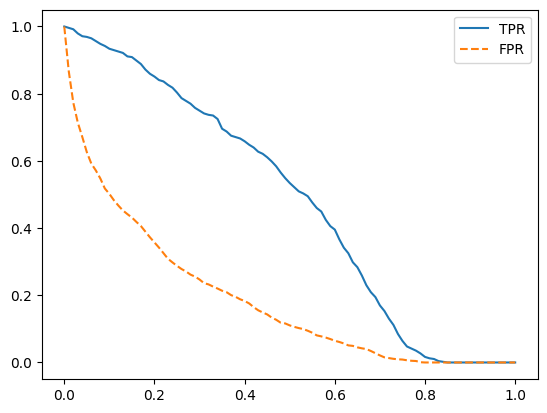

In [68]:
plt.plot(df_scores['thereshold'],df_scores['tpr'],label='TPR')
plt.plot(df_scores['thereshold'],df_scores['fpr'],label='FPR',linestyle='--')
plt.legend()

### Random baseline model

In [69]:
np.random.seed(42)
y_rand = np.random.uniform(0,1,size=len(y_val))

In [70]:

def tpr_fpr_dataframe(y_val, y_pred_val):
    scores = []
    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        tp = ((y_pred_val >=t)&(y_val == 1 )).sum()
        fp = ((y_pred_val >=t)&(y_val == 0 )).sum()
        fn = ((y_pred_val < t)&(y_val == 1 )).sum()
        tn = ((y_pred_val < t)&(y_val == 0 )).sum()
        scores.append((t,tp,fp,fn,tn))
        
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['thereshold','tp','fp','fn','tn']
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [71]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)
df_rand[::10]

,thereshold,tp,fp,fn,tn,tpr,fpr
0,0.0,483,1377,0,0,1.000000,1.000000
10,0.1,427,1233,56,144,0.884058,0.895425
20,0.2,374,1087,109,290,0.774327,0.789397
30,0.3,328,957,155,420,0.679089,0.694989
40,0.4,287,819,196,558,0.594203,0.594771
50,0.5,243,697,240,680,0.503106,0.506173
60,0.6,200,562,283,815,0.414079,0.408134
70,0.7,143,410,340,967,0.296066,0.297749
80,0.8,104,277,379,1100,0.215321,0.201162
90,0.9,54,134,429,1243,0.111801,0.097313


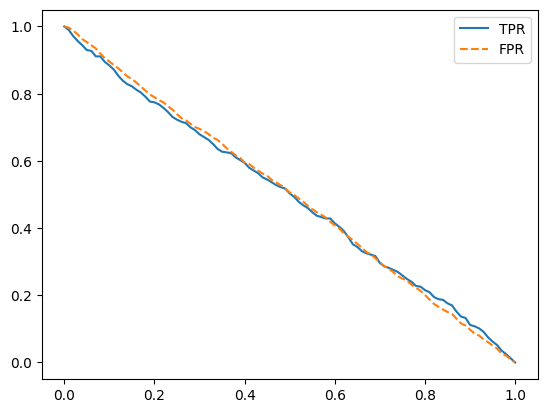

In [72]:
plt.plot(df_rand['thereshold'],df_rand['tpr'],label='TPR')
plt.plot(df_rand['thereshold'],df_rand['fpr'],label='FPR',linestyle='--')
plt.legend()

### The ideal model

In [73]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_pred_ideal = np.linspace(0,1,num_neg + num_pos)
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

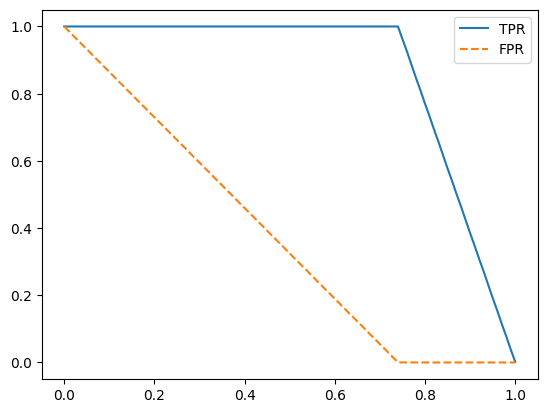

In [74]:
plt.plot(df_ideal['thereshold'],df_ideal['tpr'],label='TPR')
plt.plot(df_ideal['thereshold'],df_ideal['fpr'],label='FPR',linestyle='--')
plt.legend()

### ROC Curve

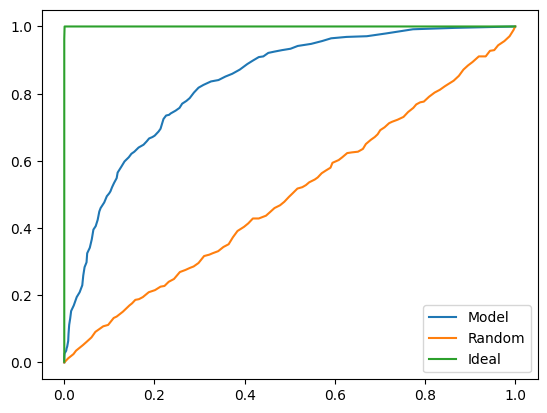

In [75]:

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')
plt.legend()


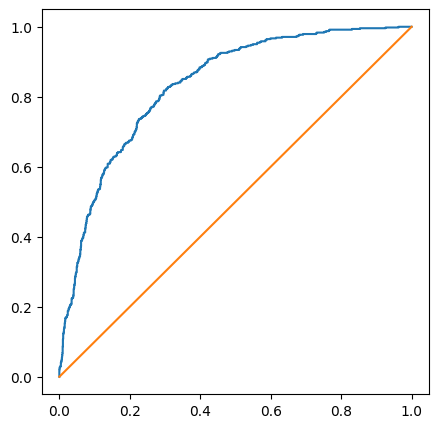

In [76]:
from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_val,y_pred_val)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

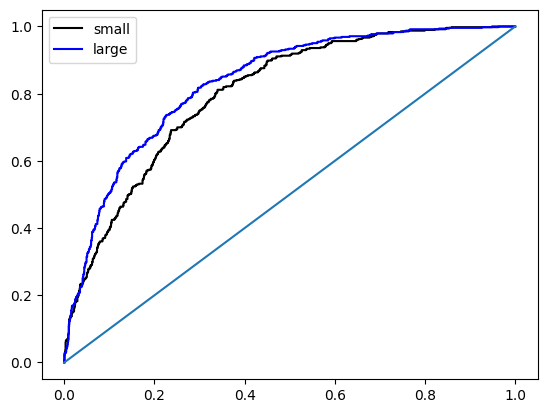

In [77]:
fpr_large , tpr_large, _ =  roc_curve(y_val,y_pred_val)
frp_small , tpr_small, _ = roc_curve(y_val,y_pred_small)

plt.figure()
plt.plot(frp_small, tpr_small, color='black', label='small')
plt.plot(fpr_large, tpr_large, color='blue', label='large')
plt.plot([0,1],[0,1])
plt.legend()

### Area under the ROC curve (AUC)

In [78]:
from sklearn.metrics import auc
auc(df_scores['fpr'],df_scores['tpr'])

0.8325823082856331

An AUC of 0.9 is indicative of a reasonably good model; 0.8 is
okay, 0.7 is not very performant, and 0.6 indicates quite poor performance.

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_val)

0.8323522645773285

In [80]:
roc_auc_score(y_val, y_pred_small)

0.8011211999560963

In [81]:
neg = y_pred_val[y_val == 0]
pos = y_pred_val[y_val == 1]

In [82]:
np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8348

### Parameter tuning 

### k-fold cross-validation

In [83]:
def train(df,y):
    cat = df[categorical + numerical ].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X,y)
    return dv, model
    

In [84]:
def predict(df,dv,model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [85]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10,shuffle=True, random_state=42)
aucs=[]

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train=df_train.churn.values
    y_val=df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv,model)
    
    auc = roc_auc_score(y_val,y_pred)
    aucs.append(auc)
    print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.855 ± 0.000
auc = 0.843 ± 0.012
auc = 0.839 ± 0.012
auc = 0.841 ± 0.011
auc = 0.842 ± 0.010
auc = 0.837 ± 0.016
auc = 0.838 ± 0.015
auc = 0.837 ± 0.015
auc = 0.839 ± 0.015
auc = 0.841 ± 0.015


### Finding best parametrs

In [86]:
def train(df,y,C):
    cat = df[categorical + numerical ].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear',C=C)
    model.fit(X,y)
    return dv, model
    

In [87]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train=df_train.churn.values
        y_val=df_val.churn.values

        dv, model = train(df_train, y_train,C)
        y_pred = predict(df_val, dv,model)

        auc = roc_auc_score(y_val,y_pred)
        aucs.append(auc)
        print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))
print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

auc = 0.817 ± 0.000
auc = 0.817 ± 0.000
auc = 0.822 ± 0.006
auc = 0.822 ± 0.005
auc = 0.821 ± 0.005
auc = 0.833 ± 0.000
auc = 0.837 ± 0.004
auc = 0.838 ± 0.004
auc = 0.840 ± 0.005
auc = 0.838 ± 0.005
auc = 0.835 ± 0.000
auc = 0.840 ± 0.005
auc = 0.839 ± 0.004
auc = 0.841 ± 0.005
auc = 0.840 ± 0.005
auc = 0.835 ± 0.000
auc = 0.839 ± 0.004
auc = 0.838 ± 0.004
auc = 0.841 ± 0.005
auc = 0.840 ± 0.005
auc = 0.835 ± 0.000
auc = 0.839 ± 0.005
auc = 0.839 ± 0.004
auc = 0.841 ± 0.005
auc = 0.840 ± 0.005
auc = 0.835 ± 0.000
auc = 0.839 ± 0.005
auc = 0.839 ± 0.004
auc = 0.841 ± 0.005
auc = 0.840 ± 0.005
C=10, auc = 0.840 ± 0.005


In [88]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv ,model = train(df_train_full, y_train,C=0.5)
y_pred =predict(df_test,dv,model)

auc = roc_auc_score(y_test,y_pred)
print('auc = %0.3f' % auc)


auc = 0.861


When we execute the code, we see that the performance of the model (AUC) on the
held-out test set is 0.86

## Deploying machine learning models

### Churn-predictions model

In [89]:
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [90]:
df  = pd.DataFrame([customer])
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,no,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75


In [91]:
y_pred =predict(df,dv,model)
y_pred[0]

0.059004746656397024

In [92]:
def predict(df,dv,model):
    cat = df[categorical + numerical ].to_dict(orient='rows')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [93]:
def predict_single(customer,dv,model):

    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:,1]
    return y_pred[0]

In [94]:
predict_single(customer, dv, model)

0.059004746656397024

### Using Pickle to save and load the model

In [95]:
import pickle 

with open('churn-model.bin','wb') as f_out:
    pickle.dump(model, f_out)


In [96]:
with open('churn-model.bin','wb') as f_out:
    pickle.dump((dv,model), f_out)
    

### Loading the model

In [97]:
with open('churn-model.bin','rb') as f_in:
    dv, model = pickle.load(f_in)

### Make post

In [98]:
import requests
url = 'http://localhost:9697/predict'
response = requests.post(url, json=customer )
result=response.json()
result

{'churn': False, 'churn_probability': 0.059004746656397024}